In [61]:
library('ggplot2')
theme_set(theme_bw())  # pre-set the bw theme.
library('reshape2')
library('lattice')
library('dplyr')
library(ggcorrplot)
library(randomForest)
library(caret)
library('MLmetrics')
data <- read.csv('Data_Train.csv')
na.omit(data)


ERROR: Error in library("MLmetrics"): there is no package called 'MLmetrics'


In [2]:
is.na(data) #cheaking for an values

Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [3]:
dim(data)#get dimensions
summary(data)

[1] 6019   12

                     Name            Location         Year     
 Mahindra XUV500 W8 2WD:  49   Mumbai    : 790   Min.   :1998  
 Maruti Swift VDI      :  45   Hyderabad : 742   1st Qu.:2011  
 Honda City 1.5 S MT   :  34   Kochi     : 651   Median :2014  
 Maruti Swift Dzire VDI:  34   Coimbatore: 636   Mean   :2013  
 Maruti Swift VDI BSIV :  31   Pune      : 622   3rd Qu.:2016  
 Hyundai i10 Sportz    :  30   Delhi     : 554   Max.   :2019  
 (Other)               :5796   (Other)   :2024                 
 Kilometers_Driven    Fuel_Type       Transmission           Owner_Type  
 Min.   :    171   CNG     :  56   Automatic:1720   First         :4929  
 1st Qu.:  34000   Diesel  :3205   Manual   :4299   Fourth & Above:   9  
 Median :  53000   Electric:   2                    Second        : 968  
 Mean   :  58738   LPG     :  10                    Third         : 113  
 3rd Qu.:  73000   Petrol  :2746                                         
 Max.   :6500000                            

In [4]:
arrange(data, Kilometers_Driven) #acc order in terms of Kilometers driven

Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.70,796 CC,47.3,5,3.60
Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.50,1197 CC,81.8,5,6.25
Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.90,1197 CC,81.86,5,6.50
Tata Tigor 1.2 Revotron XTA,Ahmedabad,2018,1000,Petrol,Automatic,First,20.30,1199 CC,84,5,6.85
Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000,Petrol,Manual,First,18.78,999 CC,75,5,5.68
Jaguar XE 2.0L Diesel Prestige,Delhi,2018,1000,Diesel,Automatic,First,13.60,1999 CC,177,5,40.00
Tata Xenon XT EX 4X2,Jaipur,2017,1000,Diesel,Manual,First,13.49,2179 CC,138.03,5,7.50
Maruti Ignis 1.2 Alpha,Mumbai,2017,1000,Petrol,Manual,First,20.89,1197 CC,81.8,5,6.36
Ford Figo 2015-2019 1.2P Sports Edition MT,Mumbai,2019,1000,Petrol,Manual,First,18.12,1196 CC,86.8,5,6.80
Hyundai i20 Active SX Dual Tone Petrol,Pune,2019,1000,Petrol,Manual,First,17.19,1197 CC,81.86,5,8.60


In [5]:
data

Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16,5,1.75
Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2,5,12.50
Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7,5,4.50
Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76,7,6.00
Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8,5,17.74
Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814 CC,55.2,5,2.35
Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461 CC,63.1,5,3.50
Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755 CC,171.5,8,17.50
Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598 CC,103.6,5,5.20
Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248 CC,74,5,1.95


In [6]:
min(data$Price) #min price val
max(data$Price)
data <- data[ !(data$Kilometers_Driven > 175000),]#remove kilometers greater than 175000
data_Mumbai <- filter(data , Location == 'Mumbai')#get only vehicals from mumbai
data_Numeric <- filter(data, Kilometers_Driven, Mileage , Seats ,Power , Price) #select only numeric vlues

[1] 0.44

[1] 160

Warning message in Ops.factor((~Kilometers_Driven) & ~Mileage & ~Seats, ~Power):
"'&' not meaningful for factors"

In [7]:
class(data$Engine)

[1] "factor"

In [8]:
arrange(data_Mumbai, Kilometers_Driven)


Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.70,796 CC,47.3,5,3.60
Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.50,1197 CC,81.8,5,6.25
Maruti Ignis 1.2 Alpha,Mumbai,2017,1000,Petrol,Manual,First,20.89,1197 CC,81.8,5,6.36
Ford Figo 2015-2019 1.2P Sports Edition MT,Mumbai,2019,1000,Petrol,Manual,First,18.12,1196 CC,86.8,5,6.80
Renault Captur 1.5 Diesel Platine Mono,Mumbai,2018,1011,Diesel,Manual,First,20.37,1461 CC,108.45,5,13.50
Ford Freestyle Titanium Petrol,Mumbai,2007,1261,Petrol,Manual,First,19.00,1194 CC,94.68,5,6.00
BMW X3 xDrive 20d Luxury Line,Mumbai,2018,1400,Diesel,Automatic,First,18.56,1995 CC,190,5,61.25
Renault KWID RXT Optional,Mumbai,2018,1617,Petrol,Manual,First,25.17,799 CC,53.3,5,4.29
Maruti Wagon R VXI AMT,Mumbai,2018,1997,Petrol,Automatic,First,22.50,998 CC,67,5,4.45
Ford EcoSport 1.5 Ti VCT MT Titanium BE,Mumbai,2017,2000,Petrol,Manual,First,18.88,1499 CC,110.4,5,8.65


In [9]:
unique(data$Engine, incomparables = FALSE) #get all engine types


[1] 998 CC  1582 CC 1199 CC 1248 CC 1968 CC 814 CC  1461 CC 2755 CC 1598 CC
 [10] 1462 CC 1497 CC 2179 CC 2477 CC 1498 CC 2143 CC 1995 CC 1984 CC 1197 CC
 [19] 1798 CC 2696 CC 2698 CC 1061 CC 1198 CC 2987 CC 796 CC  624 CC  1999 CC
 [28] 1991 CC 2694 CC 1120 CC 2498 CC 799 CC  2393 CC 1399 CC 1796 CC 2148 CC
 [37] 1950 CC 1396 CC 4806 CC 2494 CC 1086 CC 1193 CC 2982 CC 1493 CC 2967 CC
 [46] 2993 CC 1196 CC 1799 CC 2497 CC 2354 CC 1373 CC 2996 CC 1591 CC 2894 CC
 [55] 5461 CC 1595 CC 1998 CC 936 CC  1997 CC         1896 CC 1390 CC 1364 CC
 [64] 2199 CC 993 CC  999 CC  1405 CC 2956 CC 1794 CC 995 CC  2496 CC 1599 CC
 [73] 2400 CC 1495 CC 2523 CC 793 CC  4134 CC 1596 CC 1395 CC 1586 CC 2362 CC
 [82] 1496 CC 1368 CC 1298 CC 1956 CC 1299 CC 3498 CC 2835 CC 1150 CC 3198 CC
 [91] 1343 CC 1499 CC 1186 CC 1590 CC 2609 CC 2446 CC 1978 CC 2360 CC 3436 CC
[100] 2198 CC 4367 CC 2706 CC 1422 CC 2979 CC 1969 CC 1489 CC 2489 CC 1242 CC
[109] 1388 CC 1172 CC 2499 CC 2953 CC 2495 CC 1194 CC 1781 CC 1341 CC 2773 CC
[118] 3597 CC 1985 CC 2147 CC 1047 CC 2999 CC 2995 CC 2997 CC 1948 CC 2359 CC
[127] 4395 CC 2349 CC 2720 CC 1468 CC 3197 CC 2487 CC 1597 CC 2771 CC 72 CC  
[136] 4951 CC 970 CC  2925 CC 2200 CC 5000 CC 2149 CC 5998 CC 2092 CC 5204 CC
[145] 2112 CC 1797 CC
147 Levels:  1047 CC 1061 CC 1086 CC 1120 CC 1150 CC 1172 CC 1186 CC ... 999 CC

In [10]:
unique(data$Seats, incomparables = FALSE)


[1]  5  7  8  4  6  2 NA 10  9  0

In [11]:
unique(data$Location, incomparables = FALSE)

[1] Mumbai     Pune       Chennai    Coimbatore Hyderabad  Jaipur    
 [7] Kochi      Kolkata    Delhi      Bangalore  Ahmedabad 
11 Levels: Ahmedabad Bangalore Chennai Coimbatore Delhi Hyderabad ... Pune

In [12]:
unique(data$Fuel_Type, incomparables = FALSE)


[1] CNG      Diesel   Petrol   LPG      Electric
Levels: CNG Diesel Electric LPG Petrol

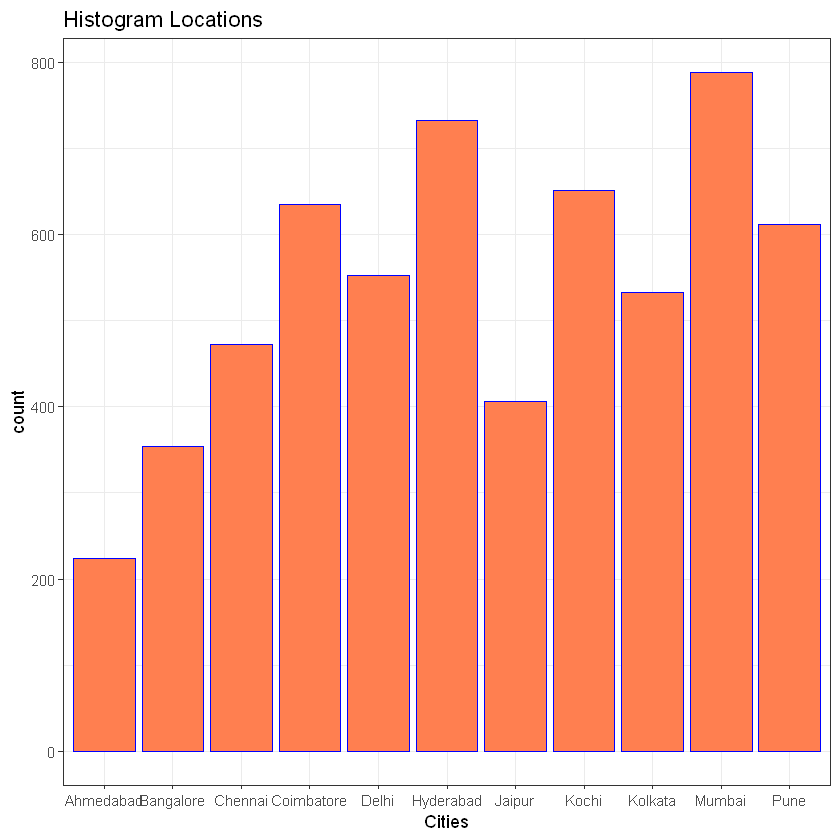

In [13]:
data %>%
ggplot(aes(Location)) +
geom_bar( fill = "coral", color = "blue") +
ggtitle('Histogram Locations') +
labs(x = "Cities")
#ggsave('histogram2.png', width = 8, height = 4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


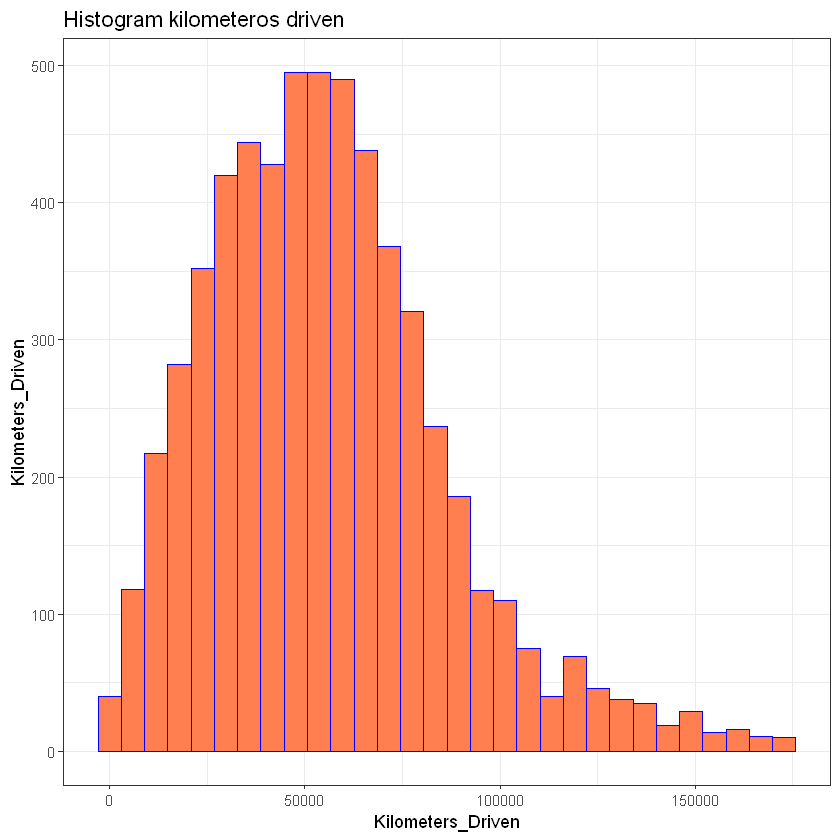

In [14]:
#Histogram of lot.sale.days
data %>%
ggplot(aes(Kilometers_Driven)) +
geom_histogram( fill = "coral", color = "blue") +
ggtitle('Histogram kilometeros driven') +
labs(y = "Kilometers_Driven")
#ggsave('histogram2.png', width = 8, height = 4)

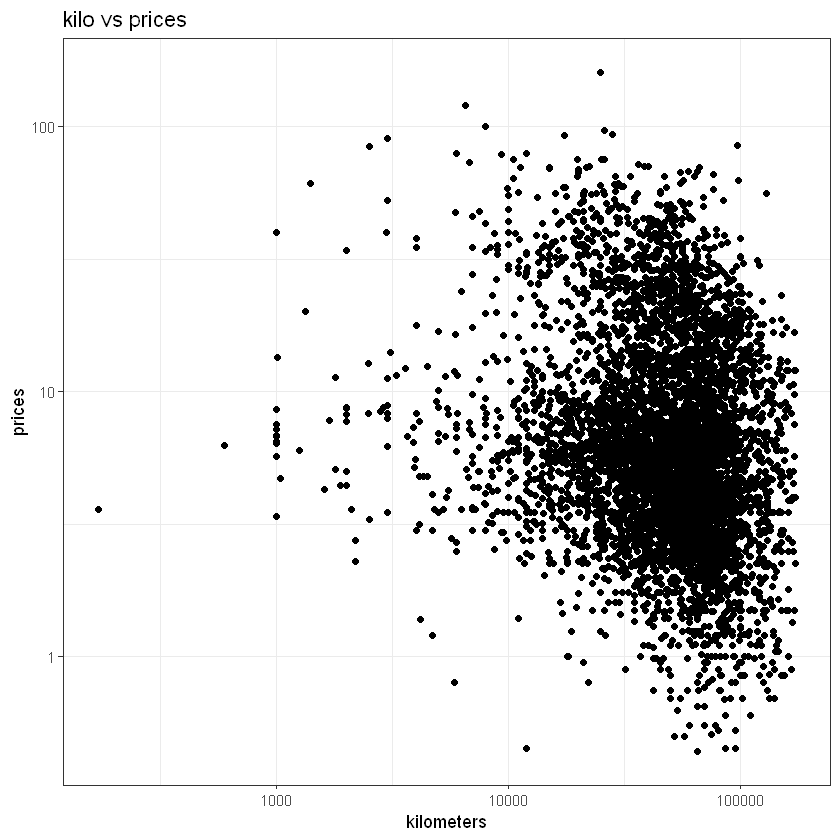

In [15]:
options(scipen=999)  # turn-off scientific notation like 1e+48
sp<- ggplot(data = data, aes( x = Kilometers_Driven, y = Price)) + geom_point()  +xlab("kilometers") + ylab('prices')+ ggtitle('kilo vs prices') + theme_bw()
sp + scale_x_log10()+ scale_y_log10()

Warning message:
"Removed 12 rows containing missing values (geom_point)."

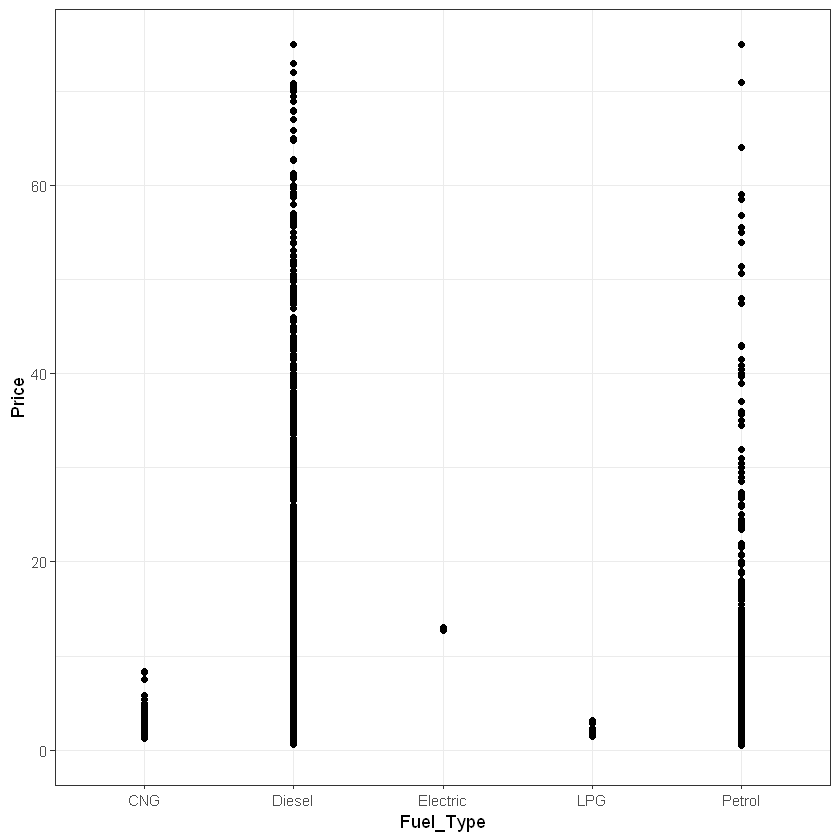

In [16]:
data %>% 
ggplot(aes(Fuel_Type, Price)) +geom_point() +ylim(0,75)
#ggsave("Fuel vs.Prices .png", width = 5, height =5)

In [17]:
#data$Milage <- lapply(data$Milage, gsub, pattern=grep[a-z], replacement='')

Warning message:
"Removed 2 rows containing missing values (geom_point)."

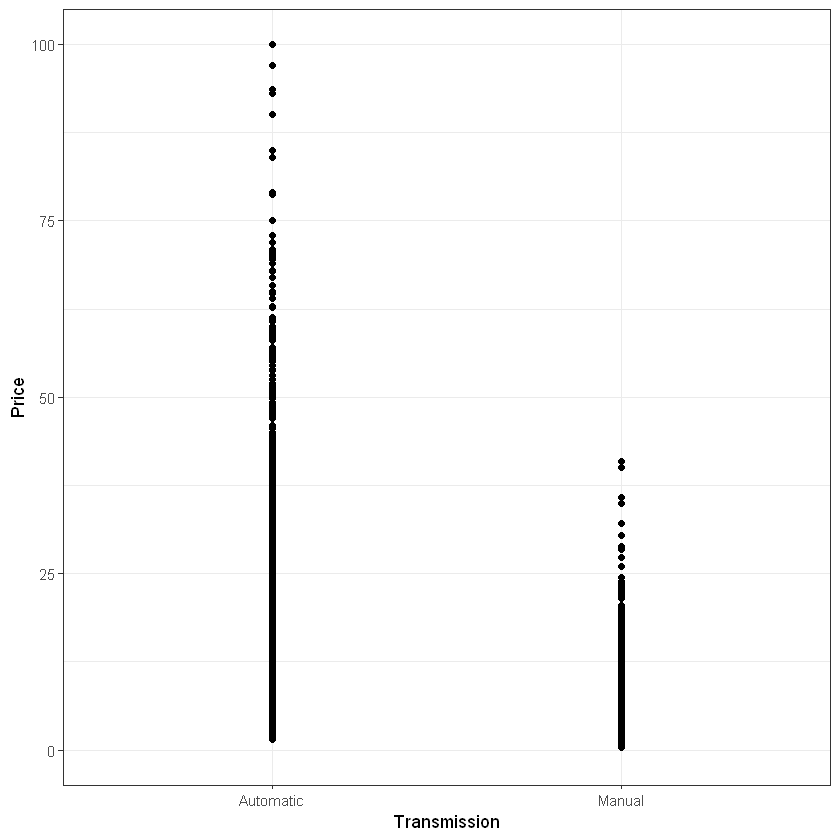

In [18]:
data %>% 
ggplot(aes(Transmission, Price)) +geom_point() + ylim(0,100)

[1] "numeric"

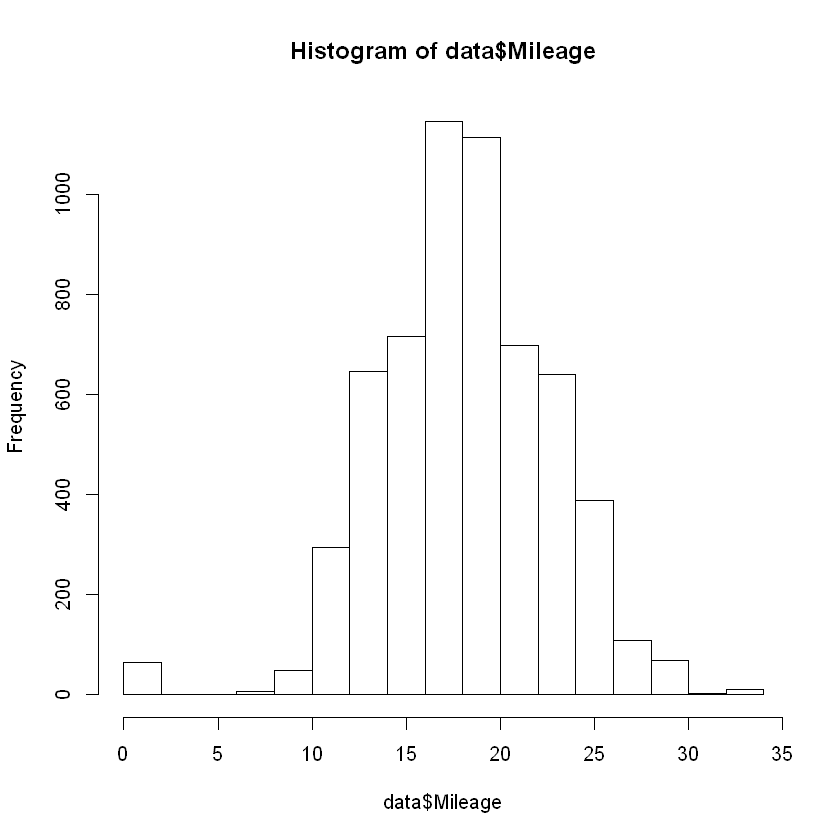

In [19]:
class(data$Mileage)
hist(data$Mileage)

In [20]:
#data$Mileage[data$Mileage == 0 | data$Mileage == 15] = "Low"
#data$Mileage[data$Mileage == 15 | data$Mileage == 22] = "Medium"
#data$Mileage[data$Mileage == 22 | data$Mileage == 35] = "High"

In [21]:
#data$Mileage = factor(data$Mileage , levels=c("Low", "Medium", "High"))

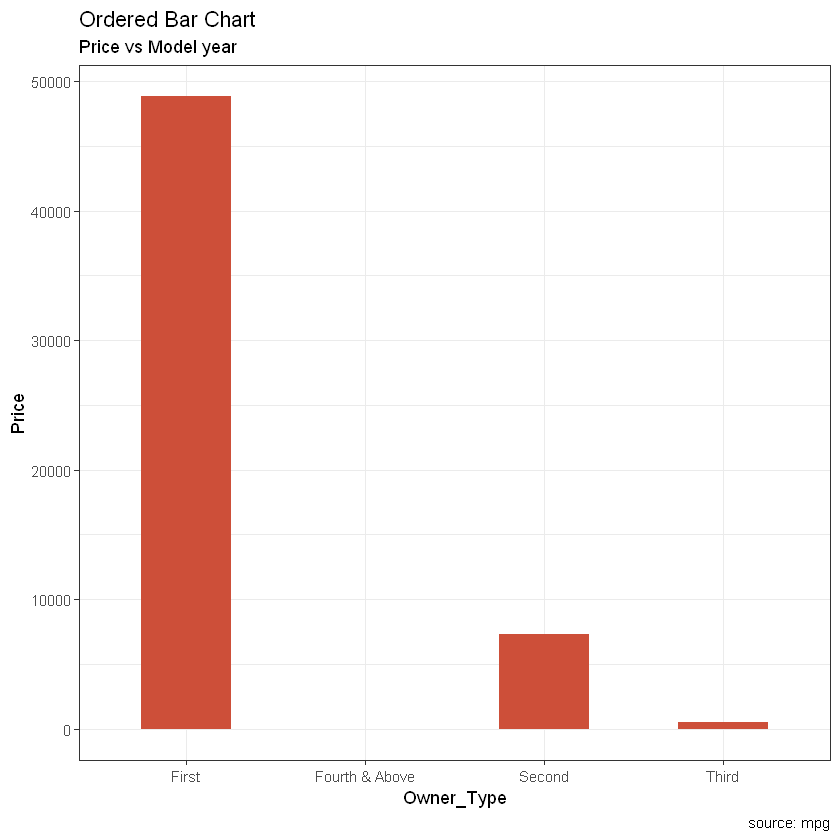

In [22]:
ggplot(data, aes(x=Owner_Type, y=Price)) + 
  geom_bar(stat="identity", width=.5, fill="tomato3") + 
  labs(title="Ordered Bar Chart", 
       subtitle="Price vs Model year", 
       caption="source: mpg") 

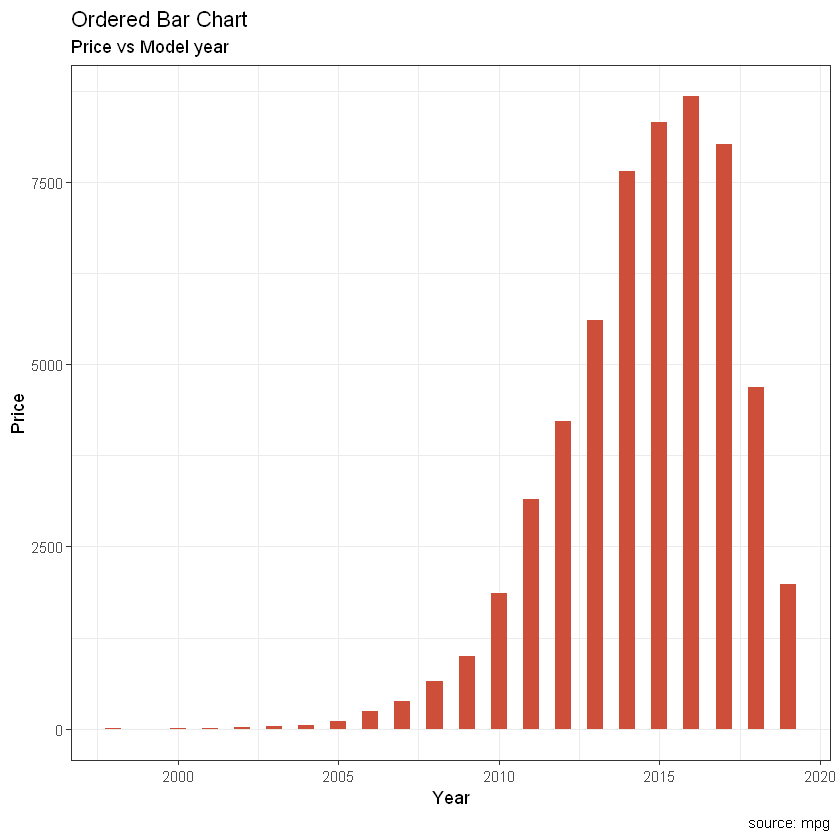

In [23]:
ggplot(data, aes(x=Year, y=Price)) + 
  geom_bar(stat="identity", width=.5, fill="tomato3") + 
  labs(title="Ordered Bar Chart", 
       subtitle="Price vs Model year", 
       caption="source: mpg") 
 # theme(axis.text.x = element_text(angle=65, vjust=0.6))

In [24]:
data$Power <-  as.numeric(data$Power)
class(data$Price)

[1] "numeric"

Warning message:
"Removed 18 rows containing missing values (geom_text)."Warning message:
"Removed 18 rows containing missing values (geom_text)."

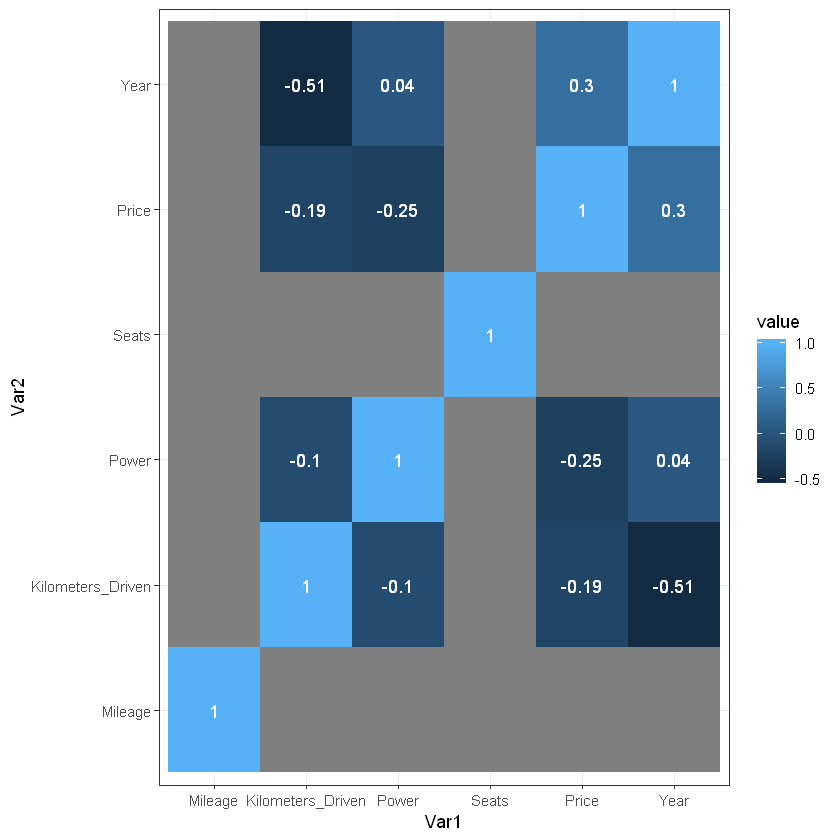

In [25]:
cormat <- round(cor(data[c('Mileage', 'Kilometers_Driven', 'Power','Seats', 'Price' , 'Year')]),2)
melted_format <- melt(cormat)

ggplot(data = melted_format, aes(x=Var1, y=Var2, fill=value )) + 
  geom_tile() + geom_text(aes(label = value), color = 'white')
ggsave('Correlation_heatmap.png', width = 5, height = 5)

In [26]:
sp_1<- ggplot(data = data, aes( x = Engine, y = Price)) + geom_point()  +xlab("Engine") + ylab('prices')+ ggtitle('kilo vs prices') + theme_bw()


In [27]:
cor(data$Kilometers_Driven , data$Price) #corelation between kilometer and prices

[1] -0.1882948

# Desiel data

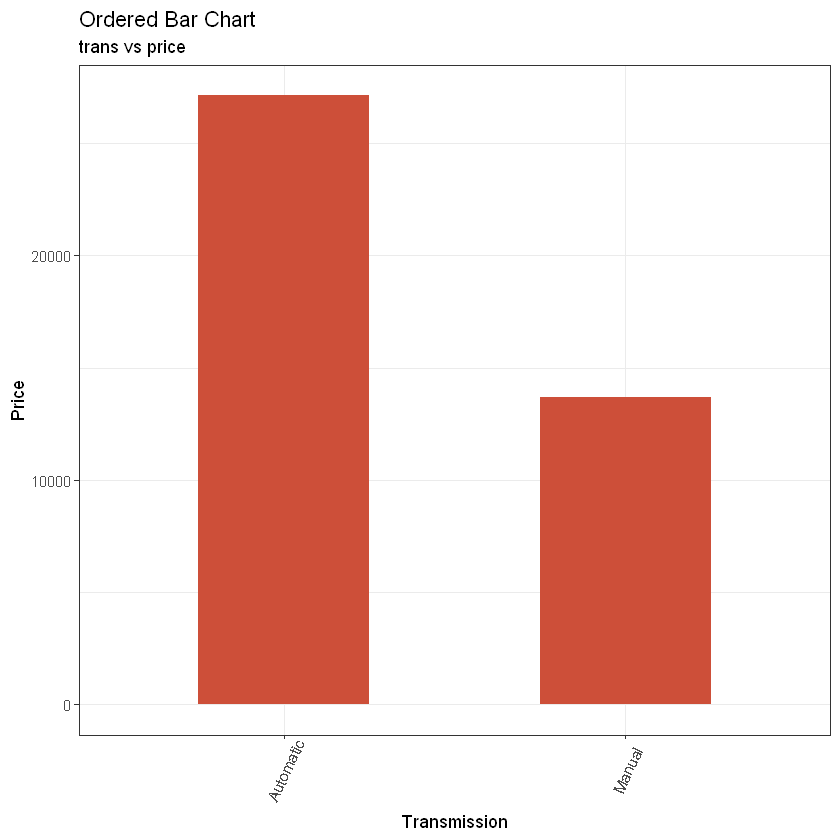

In [28]:
data_Desiel <- filter(data , Fuel_Type == 'Diesel')
data_Desiel %>% 
ggplot(data_Desiel, mapping =  aes(x=Transmission, y=Price)) + 
  
geom_bar(stat="identity", width=.5, fill="tomato3") + 
  labs(title="Ordered Bar Chart", 
       subtitle="trans vs price") + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6))

# Data after converting mileage to categories

In [29]:
data_tuned <- data
data_tuned$Mileage<-cut(data_tuned$Mileage, c(0,15,22,35) , labels = FALSE )


In [30]:
data_tuned

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,3,998 CC,262,5,1.75
2,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,2,1582 CC,58,5,12.50
3,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,2,1199 CC,344,5,4.50
4,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,2,1248 CC,346,7,6.00
5,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,2,1968 CC,78,5,17.74
6,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,2,814 CC,254,5,2.35
7,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,3,1461 CC,270,5,3.50
8,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,1,2755 CC,123,8,17.50
9,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,2,1598 CC,15,5,5.20
10,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,3,1248 CC,301,5,1.95


In [31]:
#data_conv <- data_tuned$Location
#data_conv[] <- lapply(data_conv[] , as.integer)
#data_conv[]
data_tuned$Location <- as.integer(data_tuned$Location)
data_tuned$Location

[1] 10 11  3  3  4  6  7 10 11  3  8  9  7  5 11  5  8  7  8  2  8  2 10  9
  [25]  9 10  6  6  8  2  5  2  9  4  7  8  5 11  3  5  8  4  8  2 10  1  2  7
  [49]  7  8  5  9  5  3  9  8  9  6  6 10  2  5 11  7 10  4 11 10 10 10  8  8
  [73]  4  5  7  6  6  7 11  8  6  7  5  5 11  2  6 10  5  4  5  5  9  9  1  2
  [97]  5 11 10 11  9 11  4  1  6  5  9 10  4  2 10  5  1  2  4 10 10 10 11  9
 [121] 11  4  9  9 11  2 11  8  7  4  6  9  8  3  4 10  5  8  9  8  8  4 11  3
 [145]  8 10 10  4  3  9  4 11  8  7  9  9  5  8  1  1 10  8 10  3  7 10  4  2
 [169]  5  2  9 10 10  7  2 10  7  8  6  7  6 10  2  8  5  8  8  4  3 10  1  9
 [193]  7  9  6  5  3 10  8  7 11  5 10  5  9  8  9  7 10  5 10  9  5 11 10  6
 [217]  4  9  3  6  4  9  4  5  8  2  8 10  6  9  8 10  9  8  8 10  8  4  3 10
 [241] 10  8  1 10  3  9  8  7  4  7  8 11  7  4 10 11  6  6 10  4  2  6  2 11
 [265]  5  5  4  2 11 10  6 11 11 10  7  8  7  8 10  8  7  9  4  6  1 11 11  5
 [289]  5  4  6  8 11  3  8  6 10  6 10  4  8  5  3  9  6  6  5  6  6  8  6 11
 [313]  5  6 11 10 10  9  6  9  8 10  4 11 11  2  8  6 11  9  1  3  3 11 11  9
 [337]  4  3  5  6  9  4  8  2  1  7 11 10  9  6  7  8  5 10  3 10 11  9 11  9
 [361]  9  2  2 10  4  6 10  3  3  3 10  3  6  8  8  7  8  2 10  6  3 11 10  5
 [385]  2  4  3  9  4  3 11  3  6 11  6  7 11  4 11  6  2  6  8  4  7  8 10 11
 [409]  3 11  7  4  9  8 10  9 10  6  4 10 10 11  2  5  4  4  8  4  4  8  2  1
 [433]  9  8  9  4  4  6  4 10 11  6  8  4  2  3  3  6  6  5  4  2  4 11  6 11
 [457]  5  6  9  1  9  2  6  4  5  3  8  3  9  5  6 10 10  5  3  4  9  7 11  9
 [481]  9 11  6  2  7  8  7  3 11  3  8 10  1 10  8  5 10  6 11 10 10  2 11  6
 [505]  8  5 11  4  6  4  1  3  7  4 11  1  4  8  8  4  8  6 10  4  7 10  4  7
 [529]  9  6  6  4  5 10  5  2  8 10 10  1  5  4  8  5 11 11  1 11  5  6  6  7
 [553]  3  1  2  7  8  8  4  7 11  9  3  4  7  3  3  3  4  4  4  9  8  3 10 10
 [577]  8  9  2  2  1  6  5 10  6  8  8 10  5  4 10  2 11 10 10  1  6  7  4  2
 [601]  4 11  4  9 10  6  6  5 11 10  4 10  8  6  3 11  8  5  6  3  3  3 10  6
 [625]  5  7  8  9  7 10  4  6  9  4  2  5  9  7  5  7  4  3  7  2 10  3 10  3
 [649]  4 10  7 10  5  7 11 11 11  4 11 11  8  6  6  7  2 10  6  7  8 11 11  3
 [673]  2  6  6  3  6 11  2  6  8 10  4  6  2  9  2  7 11  4  3  4  4  8  8  3
 [697] 11 11  5  7  6  6  8  6  9  8  2 11  4  2  8  9  1 10  7  8  3 11 11  8
 [721]  9  5  3  9  4  8  2  6  2  4  1  5  5  8  3  6  3  6 10  2  4  8  3  1
 [745]  8  8  9  6  4 11  3  9  7  4  6  4  7  3  6  1  3  4  9  1  2  4  2  2
 [769]  9 11  4  6 10  1  2  5 10  5  4  6  4  6 10  2  4 10  2  6  6  8 10  3
 [793] 11  6  4  9 10  6  9  3  8 11 11  8  2 10  4 10 11 10  9  9  7 10  1  6
 [817]  8 10  7  3  9  2 10 11  4  8  5  4 10 10  6  7 11 10  6 10  4 11  5  9
 [841]  5  9  7  4  4  3  4  9  6  3  7  4 10  4 10  4  7  4  2  5  4  1  8  7
 [865]  8  7  6 11  5  7  8  9  3  9 10 10  1  2  5  5  6  6  8 10  2  5 11  4
 [889]  8  6  4  7 10 11  6  2  4  7  8  4  4  3 11  6 10  6 10  5  3  2  5  5
 [913] 11  6  9 11  3  2  1  8  6  9  7  6  9  4  9 10  8  9  1  7  4  2 11  6
 [937]  6  7  8  4 11 10  5  5 11  8  4  9  9 10 10  9 10  4  7  9  1  6  7  4
 [961]  5  3  8 11  2  9 11  8 11  2  1 10  3  2 10  2 11  9  5 10  8  3 11 11
 [985]  4 11  3  6  6  4  3  9  5  7  6  8  6  4 10  3  9  1  3  4  8 11  9  3
[1009] 11  2  4  8  8  5  5 11  8 11  8  4  6  6 11  5  2 10  5  4  3  8  6  4
[1033]  6  9  9  6  4  9 10  6  6  5  4 11  5  6  3  5  5  6  9  2  7  9  9  8
[1057]  6 11  1  8  6  6  8  9 11 10  2 10  9  1  8  8  9  9 10  5 10 11  2  9
[1081]  6  3  8  9  3  5 11  5  4  4  2  9 10 10  4 11  7  8  6  3  4  1  6 11
[1105]  6 11  8 11  2  9  4  4  7  1  8  7  5 10  2  1 11  7  2  5  6  4  3  2
[1129]  8  4 10  4 11  8 10  2  3  9 10  5  2  6  3  8  5  1  7 11  3  1  9  1
[1153]  6 10 10 10  6  5  5  9 11  7  8  7  1  1  3  6  8  9  7 10  1  3  9  4
[1177]  6  9 10  3 11  6  6 10 10 10  9  4  6 10 10  3  9 10 10  6  7 10 10  2
[1201]  5 10 11  9  1  3  4  9  7  7  5 11  3 11  1  

Warning message:
"Removed 67 rows containing missing values (position_stack)."

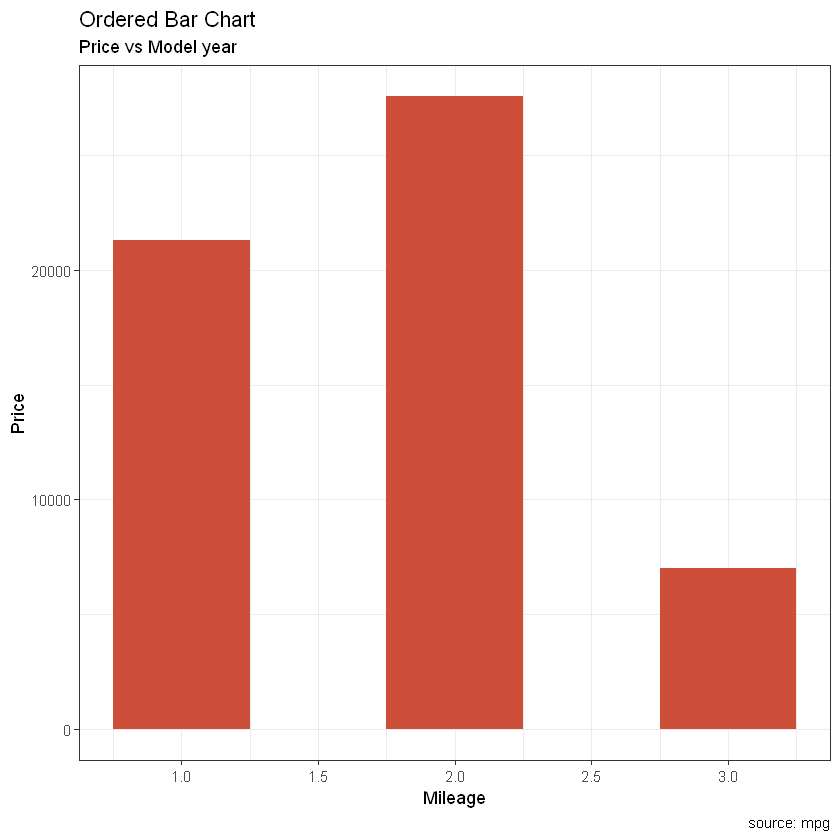

In [32]:
ggplot(data_tuned, aes(x=Mileage, y=Price)) + 
  geom_bar(stat="identity", width=.5, fill="tomato3") + 
  labs(title="Ordered Bar Chart", 
       subtitle="Price vs Model year", 
       caption="source: mpg") 

Warning message:
"Removed 14 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 81 rows containing missing values (geom_point)."

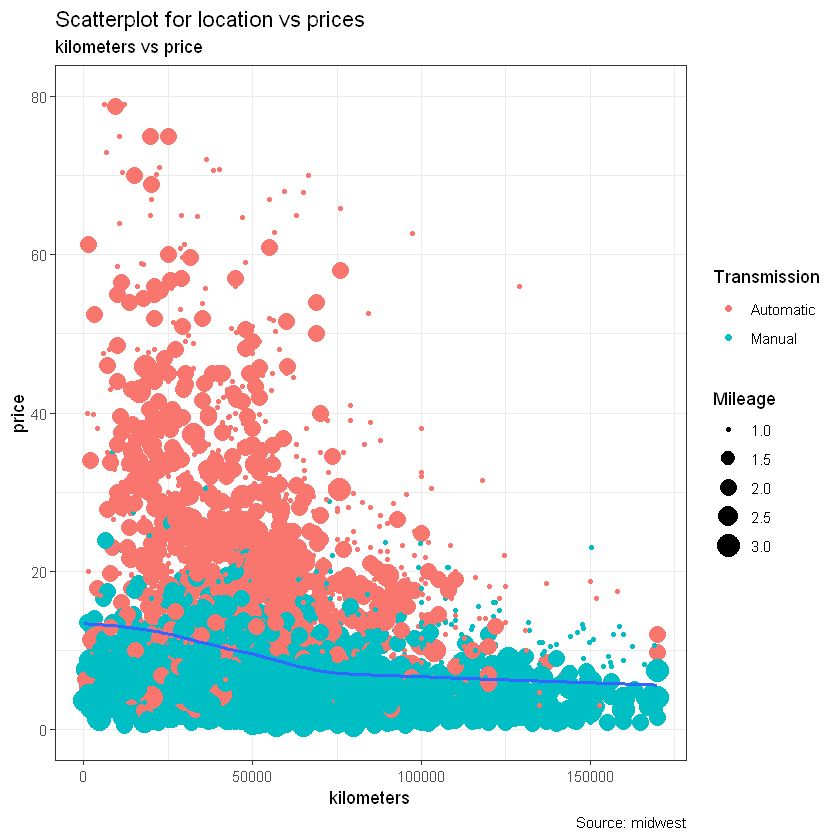

In [33]:
ggplot(data_tuned, aes(x=Kilometers_Driven, y=Price)) + 
  geom_point(aes(col=Transmission, size= Mileage)) + 
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 170000)) + 
  ylim(c(0, 80)) + 
  labs(subtitle="kilometers vs price", 
       y="price", 
       x="kilometers", 
       title="Scatterplot for location vs prices", 
       caption = "Source: midwest")


# Data from Mumbai

In [34]:
data_Mumbai <- filter(data , Location == 'Mumbai')

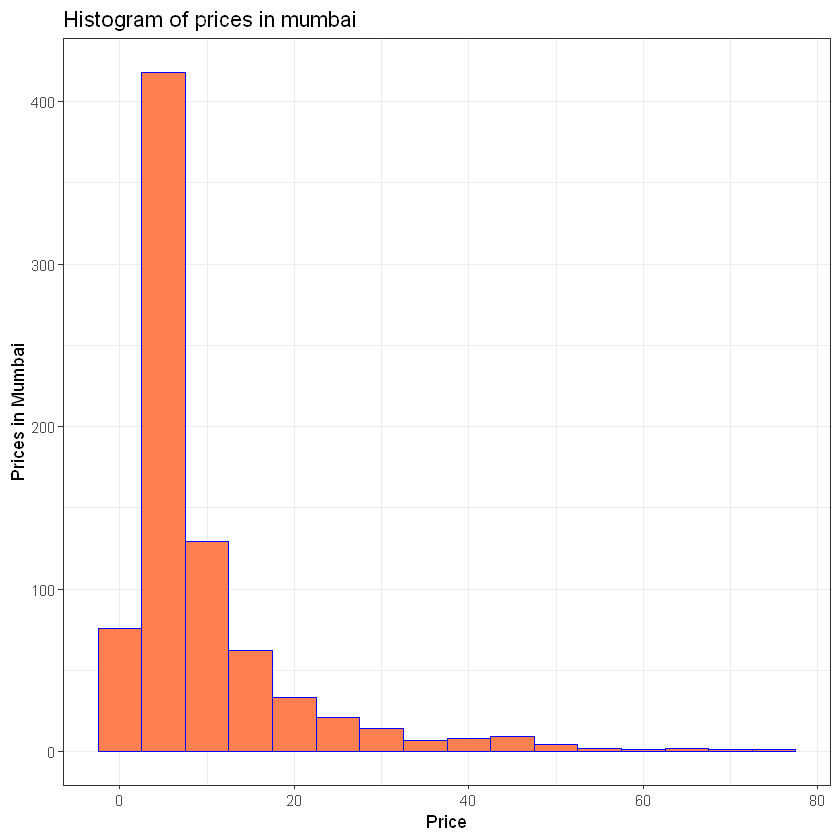

In [35]:
data_Mumbai %>%
ggplot(aes(Price)) +
geom_histogram(binwidth = 5, fill = "coral", color = "blue") +
ggtitle('Histogram of prices in mumbai') +
labs(y = "Prices in Mumbai")
#ggsave('histogram2.png', width = 8, height = 4)

Warning message:
"Removed 1 rows containing missing values (geom_point)."

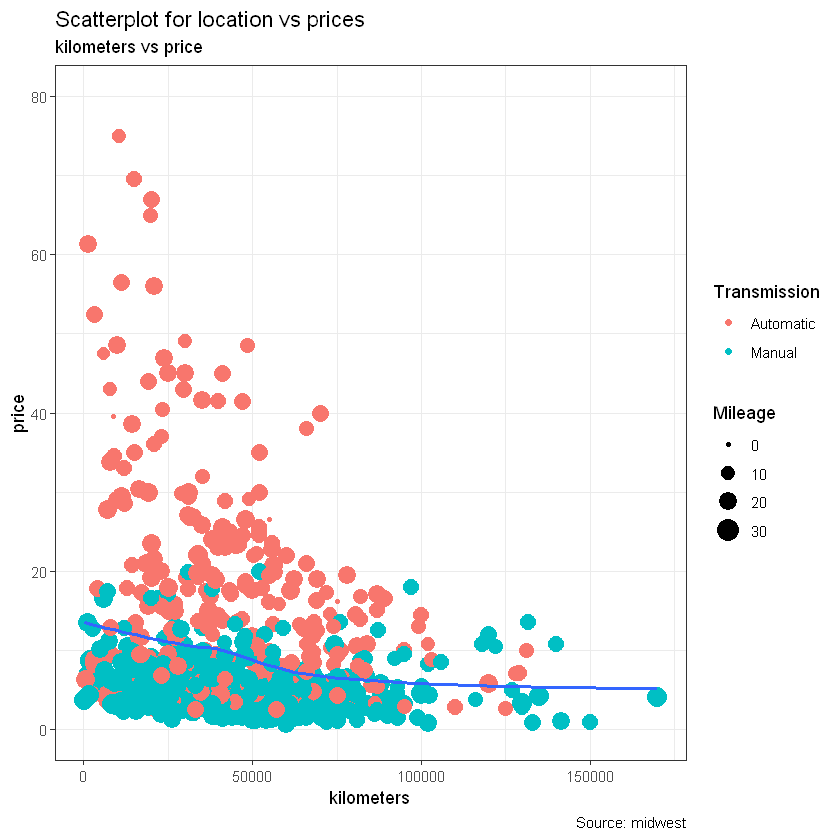

In [36]:
ggplot(data_Mumbai, aes(x=Kilometers_Driven, y=Price)) + 
  geom_point(aes(col=Transmission, size= Mileage)) + 
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 170000)) + 
  ylim(c(0, 80)) + 
  labs(subtitle="kilometers vs price", 
       y="price", 
       x="kilometers", 
       title="Scatterplot for location vs prices", 
       caption = "Source: midwest")

Warning message:
"Removed 14 rows containing missing values (geom_text)."Warning message:
"Removed 14 rows containing missing values (geom_text)."

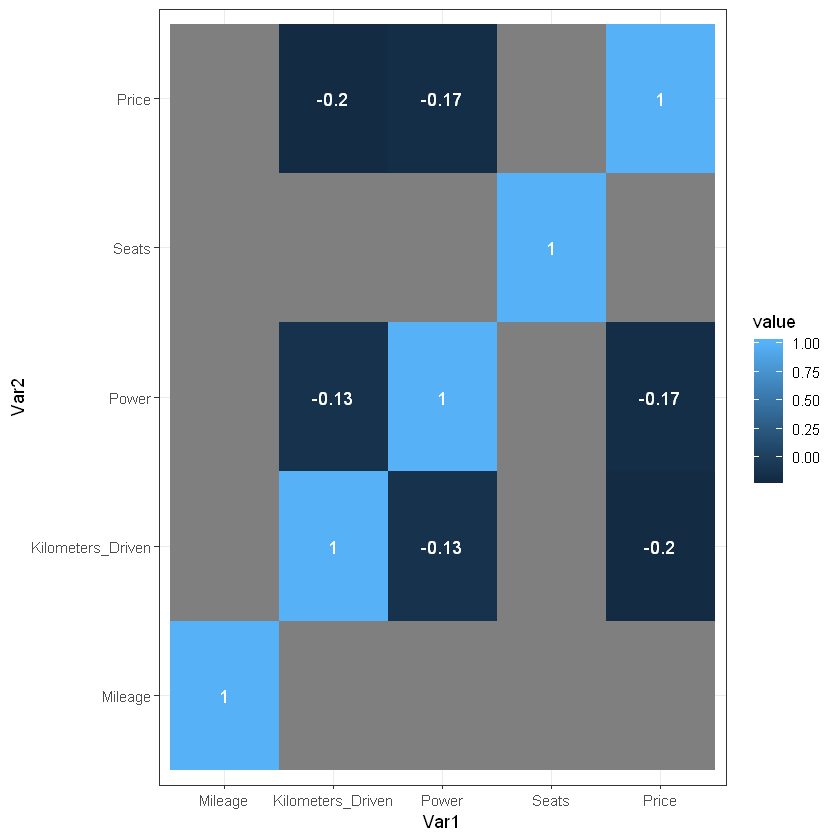

In [37]:
cormat <- round(cor(data_Mumbai[c('Mileage', 'Kilometers_Driven', 'Power','Seats', 'Price')]),2)
melted_format <- melt(cormat)

ggplot(data = melted_format, aes(x=Var1, y=Var2, fill=value )) + 
  geom_tile() + geom_text(aes(label = value), color = 'white')
ggsave('Correlation_heatmap.png', width = 5, height = 5)

# Data containing all the New Price values

In [38]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,262,5,1.75
2,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,58,5,12.50
3,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,344,5,4.50
4,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,346,7,6.00
5,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,78,5,17.74
6,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814 CC,254,5,2.35
7,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461 CC,270,5,3.50
8,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755 CC,123,8,17.50
9,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598 CC,15,5,5.20
10,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248 CC,301,5,1.95


# CONVERT ALL VARIABLS TO NUMBERS FOR HEAT MAP

In [39]:
data_var <- data
data_var$Location <- as.integer(data_var$Location)
#data_var$Location
data_var$Fuel_Type <- as.integer(data_var$Fuel_Type)
data_var$Transmission <- as.integer(data_var$Transmission)
data_var$Owner_Type <- as.integer(data_var$Owner_Type)

Warning message:
"Removed 26 rows containing missing values (geom_text)."Warning message:
"Removed 26 rows containing missing values (geom_text)."

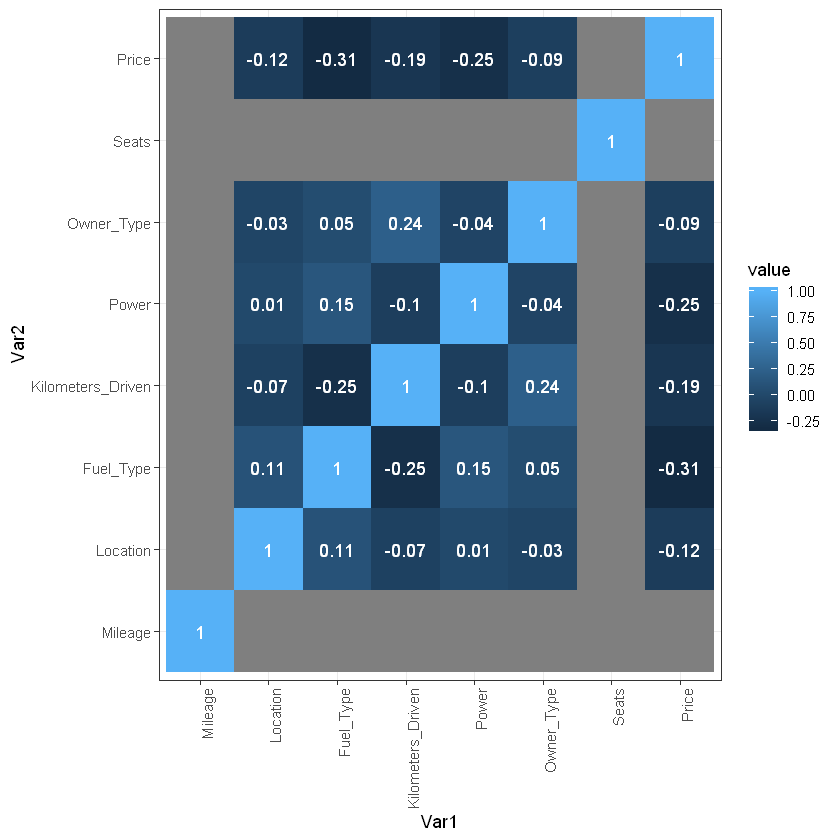

In [40]:
cormat <- round(cor(data_var[c('Mileage', 'Location', 'Fuel_Type','Kilometers_Driven', 'Power','Owner_Type','Seats', 'Price')]),2)
melted_format <- melt(cormat)

ggplot(data = melted_format, aes(x=Var1, y=Var2, fill=value )) + 
  geom_tile() + geom_text(aes(label = value), color = 'white')+theme(axis.text.x = element_text(angle = 90, hjust = 1))
ggsave('Correlation_heatmap.png', width = 5, height = 5)

# MODEL MAKING
## Linear regression

In [41]:
data_Test <- read.csv('Data_Test.csv')
data_Test = subset(data_Test, select = -c(Location) )

In [42]:
data_test_1 <- data_Test
#data_test_1$Location <- as.integer(data_test_1$Location)
data_test_1$Fuel_Type <- as.integer(data_test_1$Fuel_Type)
data_test_1$Transmission <- as.integer(data_test_1$Transmission)
data_test_1$Owner_Type <- as.integer(data_test_1$Owner_Type)


In [43]:
#require(caTools)  # loading caTools library

smp_size <- floor(0.75 * nrow(data))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data)), size = smp_size)

train <- data_var[train_ind, ]
test <- data_var[-train_ind, ]
#test_1 = subset(test, select = -c(Price) )
#na.rm(test)= TRUE

In [44]:
nrow(subset(test, select = -c(Price) ))
nrow(test)

[1] 1490

[1] 1490

In [45]:
model <- lm( Price~ Mileage+Fuel_Type+Kilometers_Driven+Power+Owner_Type+Seats ,data = train)

In [46]:
p <-predict(model,subset(test, select = -c(Price) ), filename="data_pre",na.rm=TRUE)
#p<- data.frame(predict = predict(model,subset(test, select = -c(Price)))) 

#data_pre#as.factor(p)
#as.factor(test)

In [47]:
as.matrix(table(factor(p, levels=min(test$Price):max(test$Price)), 
      factor(test$Price, levels=min(test$Price):max(test$Price))))
                
                

       
        0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 12.5 13.5 14.5 15.5
  0.5     0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0
  1.5     0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0
  2.5     0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0
  3.5     0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0
  4.5     0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0
  5.5     0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0
  6.5     0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0
  7.5     0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0
  8.5     0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0
  9.5     0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0
  10.5    0   0   0   0   0   0   0   0   0   0    0    0    0    0    0    0
  11.5    0   0   0   0   0   0   0   0   0   0    0    

In [48]:
nrow(p)

NULL

In [49]:
#p<- factor(p)
#test$Price <- factor(test$Price)
p <-as.numeric(p)
test$Price <- as.numeric(test$Price)
class(test$Price)
str(p)
str(test$Price)


[1] "numeric"

 num [1:1490] 4.95 3.28 1.89 12.74 4.88 ...
 num [1:1490] 4.5 6 2.35 5.2 9.95 27 17.5 8.25 23.5 1.87 ...


In [50]:
na.omit(test$Price)
na.omit(p)


[1]   4.50   6.00   2.35   5.20   9.95  27.00  17.50   8.25  23.50   1.87
  [11]   2.75   9.90  11.50  28.00   5.00   1.25   4.74   4.25   3.85   3.85
  [21]  26.70  13.50   6.46  29.50   4.82  13.90   2.25   5.75  16.50   5.50
  [31]   3.50   4.65   3.95   3.90   5.75   2.15  20.75   6.55   0.85   5.25
  [41]   7.47  13.25  11.50   2.50  11.25   7.11   6.20   3.65  23.00   8.35
  [51]  22.95   1.50   7.50   4.04  55.76   2.60   8.50   6.00  19.90   2.11
  [61]   4.75   8.15  39.41  35.67   3.60   3.32   3.60   3.87   7.20   8.45
  [71]   1.80   3.70   5.95   4.28   3.11   6.90   1.35   2.80   2.10   4.25
  [81]   3.65   3.13   2.85   2.65   1.80  21.95  49.00   1.40   5.50   3.30
  [91]   2.55   2.50   3.50   6.75   0.95   2.75   3.25   3.25  12.95   1.95
 [101]   3.91   2.75   4.95  19.00  13.05   0.80   6.90   2.25  24.50   3.20
 [111]   9.89   3.74   3.35   7.10   2.25  36.50   7.20   5.99  23.00   2.25
 [121]   2.75  18.58   3.20   4.15   2.60   2.55   6.25  18.50   4.80   3.76
 [131]   8.58  27.50   4.95   8.00   1.00   3.85   2.85  18.50   2.20  17.00
 [141]   5.65   5.60   6.00   5.25  10.88  13.50   5.75  19.00   4.39  11.69
 [151]   1.45  12.50   6.90   5.80   4.35   3.95  20.50   0.65   5.90  23.50
 [161]  75.00   3.00   6.30   4.65   4.10   4.38   6.60  18.75   5.64   7.88
 [171]   2.85   3.50  54.00   8.50  17.00  43.35   3.25   5.70   7.83   8.15
 [181]   6.25   7.75   3.80  23.50   1.15   5.20   1.60  39.47   5.08   1.46
 [191]   2.05   4.08  14.00   2.45  15.80   6.25   6.56   2.30   5.25  23.99
 [201]  18.95   4.25   6.51   4.25   4.58  10.50  13.96   5.50  32.80   0.70
 [211]   5.90  21.67  19.92   6.96   5.00   5.50   4.25   8.07   5.64   7.50
 [221]   3.30  20.00  10.85   7.00   1.65   6.50   7.20   5.83  18.39   5.85
 [231]   3.70   6.93   9.95   1.80   4.80   2.40   2.00   2.10   1.45   1.75
 [241]  16.50   2.80   3.80  11.65   2.25   4.75   6.33   2.47   3.30   9.50
 [251]   6.99   2.30  26.50  25.00  13.50   5.25   3.80   8.95   3.70   1.92
 [261]  20.50   1.70   3.25  14.50   3.45   2.69   2.75   2.50   3.11   5.04
 [271]   5.00  19.75   9.57  10.46   0.99   5.35   3.50   5.45   2.71   3.00
 [281]   2.95   2.50  11.37   7.20   6.00   6.55  25.00   2.10  20.40   1.55
 [291]   3.80   3.95   1.35   6.32   9.45  32.25   9.75   6.30   6.15   6.57
 [301]   7.00  32.50  15.75  14.35   2.95   2.90   1.99   2.50   4.85   9.20
 [311]   2.60  12.00  21.56  24.68   1.90   1.20  13.95   5.29   5.75   4.50
 [321]   8.75   3.41   6.93   7.90   7.55   6.75   1.69   2.40  22.00   4.28
 [331]   5.67   6.20  43.78  11.45  10.50   2.55   3.50   5.45  15.49  12.50
 [341]   6.00   3.15   5.75   0.75   9.20   4.26  27.00   2.00   2.40   1.20
 [351]  40.88   5.75   3.80  16.35   8.70  21.94  22.00   2.65   2.48  12.50
 [361]  17.49   5.50  16.50   7.79   8.27  28.79   2.60   6.17   9.15   4.50
 [371]   5.37   7.70   7.99   6.69   4.25   5.20   2.79   3.75   7.29   2.60
 [381]   3.10  29.98   6.73   3.90   1.50   7.00   7.23   3.81   7.00  24.90
 [391]  23.25   5.75   7.50   5.50   7.73  13.00   8.25   6.25   7.80   7.56
 [401]   4.75   6.00   8.00   1.40   3.40   4.95  38.00   2.35  24.50   7.06
 [411]   4.50   5.39  70.80   4.90   5.50   4.25  10.95   4.00  26.75  19.00
 [421]   5.04   4.74   5.63   4.90   2.65  38.00   4.00   5.25   7.83   6.01
 [431]   4.40  12.75   5.49  12.99   9.00   6.98   1.95   3.50   4.45   2.50
 [441]   3.90   3.50   2.00   5.35   8.20   0.90  19.41   3.25   3.60   7.52
 [451]  10.85   2.80  24.94   4.00   5.10   3.30   2.25  20.12   3.85  22.24
 [461]   1.59   8.50  21.00   1.75   6.32   1.37  12.00  23.50   5.43  31.62
 [471]  93.67   6.09   6.35   3.95   4.25  41.00  28.50   6.64   5.00   5.40
 [481]   2.59  23.00   6.29  13.50  10.25   4.88   2.80   9.75  14.50   2.40
 [491]   7.45  11.62   4.90  11.90   6.95   2.65  34.00   8.41   8.90   5.89
 [501]  45.00   2.41   2.15  10.25   6.00   7.53   8.65  36.50   3.90   7.75
 [511]   8.10   1.80   5.34  14.50   2.50   5.49   3.55  10.75   8.42  11.60

[1]   4.945771929   3.278256035   1.889577334  12.743545088   4.882922221
   [6]  20.848601124  33.298044328   6.644715765  10.339765181   4.731761231
  [11]  -1.184034932   6.917137957  26.052155251  20.154239531   9.937693796
  [16]  -4.149076463   6.022995701  18.444594061   5.410225050   1.649634989
  [21]  12.220216815  17.231945241   6.184624716  13.723427941   4.070330754
  [26]  13.375665135  -4.041947773   8.067921106  11.263578492   9.585421781
  [31]   9.186662934   6.713792643   0.097409264   4.783919161  11.173031598
  [36]   1.633049097  10.574955819   4.731778465  -2.939913349  12.938512810
  [41]   2.018391622  14.599644034  12.021434228   7.390194936  12.622247736
  [46]   7.280496287   5.196574089   1.613892899  22.753408439  13.421765310
  [51]  18.949209147   2.581938399   3.825307805   2.394044576  25.493264517
  [56]   5.044002244   4.482393154   2.624352698  18.235323599   1.437006822
  [61]  10.261378355  18.434832259  12.442633101   0.689889111  12.136565324
  [66]   8.981423637   9.819884402   5.942385678   8.153457299  12.089320405
  [71]   2.692582277   6.509249483  12.003087083   6.856537669   2.551163784
  [76]   2.516509923  -1.249747864  -4.934741744   7.026996497  -1.343189994
  [81]  11.149488636   1.886992907   6.482096944  17.462383958  32.327045657
  [86]  11.184367951   5.848276771  -1.624322714   9.089749430   5.067677862
  [91]   2.374505623   8.162622557   6.757925521   6.098541508  -0.510339849
  [96]  10.332667364  10.142466987   5.665946952   7.484948271   9.531601996
 [101]   5.203605525  23.075517307  18.773045514  16.239044404   7.043539546
 [106]   6.114805598   9.290899033   3.554073659   5.369950381   1.307473478
 [111]  26.713991017  10.996108156  -0.104849480  16.487984425   9.636424655
 [116]  12.220818685  20.637364818   8.860731311  11.231147636  16.923809648
 [121]  10.886139540   7.133396903   0.593539067   6.305985285   6.739823333
 [126]  11.197708693   7.034198274  12.833134545  13.038540202  21.523166512
 [131]   8.128880406   6.155255366   0.599326265   4.556472939   9.211310973
 [136]  13.363473747  -4.330544560  14.142917561   2.986205339   4.976470685
 [141]   5.215574478  12.393811693   8.062017850  25.364791649   3.025307580
 [146]  13.267917275  10.796482298  15.859419015  -5.406121696  12.142081738
 [151]  12.063050821   7.365811188   8.933755383   5.892581302  11.156868550
 [156]  21.152794448  14.818202465  17.079070184  21.054488680   6.552388956
 [161]   7.799720202   9.937693796   2.223787635   2.966400680   8.776127400
 [166]  16.019180572   0.499275962   8.769910976   1.515866797   4.344891904
 [171]  17.000806769   4.647731840  13.079878478  17.872532432   1.898191904
 [176]   3.970847629   8.096525223  18.809892597   7.019468173   0.480576318
 [181]   0.526139607  11.028283320  14.121557242   3.411478444   0.408628938
 [186]  17.447150907   5.267017926   8.327524291   6.682337307  10.867131431
 [191]  16.926609312  -0.214222856  24.553274940  -2.096410745   9.362311615
 [196]  -2.416437193   3.726380846  12.914425779  20.113317602  10.843111484
 [201]   6.175245924   8.661312006   8.806122046  11.159196126   9.269127659
 [206]   8.753721640  19.933569615  -0.843639304  10.570863905  12.550767458
 [211]  21.704966090   3.503886518   4.160178932  14.156911538  12.259653372
 [216]   4.955642355  14.709237813   3.429978170   8.892614084  18.766027709
 [221]  17.234207009   6.458775500   1.445114574   7.155221885  14.895168864
 [226]   6.376321071  12.493484096   5.098454420   7.400421379   7.658154929
 [231]  21.292649565  -3.704843493   7.157808280   5.556882231  11.392724440
 [236]  -3.993292804   7.941163038   1.194077492  19.717549983   5.977153784
 [241]   4.441440245  13.510582813   8.328468324  10.196384564   8.153657379
 [246]   7.186892760   8.951041291  10.214125053  13.215442902  -1.765807344
 [251]  19.441281084  17.495190811  12.289204648   4.934897499  13.430019164
 [256]  15.842583250   7.448844418   2.810511981  13.134023566   4.968732869

In [51]:
p #priting all predicted values

[1]   4.945771929   3.278256035   1.889577334  12.743545088   4.882922221
   [6]  20.848601124  33.298044328   6.644715765  10.339765181   4.731761231
  [11]  -1.184034932   6.917137957  26.052155251  20.154239531   9.937693796
  [16]  -4.149076463   6.022995701  18.444594061   5.410225050   1.649634989
  [21]  12.220216815  17.231945241   6.184624716  13.723427941   4.070330754
  [26]  13.375665135  -4.041947773   8.067921106  11.263578492   9.585421781
  [31]   9.186662934   6.713792643   0.097409264   4.783919161  11.173031598
  [36]   1.633049097  10.574955819   4.731778465  -2.939913349  12.938512810
  [41]   2.018391622  14.599644034  12.021434228   7.390194936  12.622247736
  [46]   7.280496287   5.196574089   1.613892899  22.753408439  13.421765310
  [51]  18.949209147   2.581938399   3.825307805   2.394044576  25.493264517
  [56]   5.044002244   4.482393154   2.624352698  18.235323599            NA
  [61]   1.437006822  10.261378355  18.434832259  12.442633101            NA
  [66]   0.689889111  12.136565324   8.981423637   9.819884402   5.942385678
  [71]   8.153457299  12.089320405   2.692582277   6.509249483  12.003087083
  [76]   6.856537669   2.551163784   2.516509923  -1.249747864  -4.934741744
  [81]   7.026996497  -1.343189994  11.149488636   1.886992907   6.482096944
  [86]  17.462383958  32.327045657  11.184367951   5.848276771  -1.624322714
  [91]   9.089749430   5.067677862   2.374505623   8.162622557   6.757925521
  [96]   6.098541508  -0.510339849  10.332667364  10.142466987   5.665946952
 [101]   7.484948271   9.531601996   5.203605525  23.075517307  18.773045514
 [106]  16.239044404   7.043539546   6.114805598   9.290899033   3.554073659
 [111]   5.369950381   1.307473478  26.713991017  10.996108156  -0.104849480
 [116]  16.487984425   9.636424655  12.220818685  20.637364818   8.860731311
 [121]  11.231147636  16.923809648  10.886139540   7.133396903   0.593539067
 [126]   6.305985285   6.739823333  11.197708693   7.034198274  12.833134545
 [131]  13.038540202  21.523166512   8.128880406   6.155255366   0.599326265
 [136]   4.556472939   9.211310973  13.363473747  -4.330544560  14.142917561
 [141]   2.986205339   4.976470685   5.215574478  12.393811693   8.062017850
 [146]  25.364791649   3.025307580  13.267917275  10.796482298  15.859419015
 [151]  -5.406121696  12.142081738  12.063050821   7.365811188   8.933755383
 [156]   5.892581302  11.156868550  21.152794448  14.818202465  17.079070184
 [161]  21.054488680   6.552388956   7.799720202   9.937693796   2.223787635
 [166]   2.966400680   8.776127400  16.019180572   0.499275962   8.769910976
 [171]   1.515866797   4.344891904  17.000806769   4.647731840  13.079878478
 [176]  17.872532432   1.898191904   3.970847629   8.096525223  18.809892597
 [181]   7.019468173   0.480576318   0.526139607  11.028283320  14.121557242
 [186]   3.411478444   0.408628938  17.447150907   5.267017926   8.327524291
 [191]   6.682337307  10.867131431  16.926609312  -0.214222856  24.553274940
 [196]  -2.096410745   9.362311615  -2.416437193   3.726380846  12.914425779
 [201]  20.113317602  10.843111484   6.175245924   8.661312006   8.806122046
 [206]  11.159196126   9.269127659   8.753721640  19.933569615  -0.843639304
 [211]  10.570863905  12.550767458  21.704966090   3.503886518   4.160178932
 [216]  14.156911538  12.259653372   4.955642355  14.709237813   3.429978170
 [221]   8.892614084  18.766027709  17.234207009   6.458775500   1.445114574
 [226]   7.155221885  14.895168864   6.376321071  12.493484096   5.098454420
 [231]   7.400421379   7.658154929  21.292649565  -3.704843493   7.157808280
 [236]   5.556882231  11.392724440  -3.993292804   7.941163038   1.194077492
 [241]  19.717549983   5.977153784   4.441440245  13.510582813   8.328468324
 [246]  10.196384564   8.153657379   7.186892760   8.951041291  10.214125053
 [251]  13.215442902  -1.765807344  19.441281084  17.495190811  12.289204648
 [256]   4.934897499  13.430019164  15.842583250   7.448844418   2.810511981

In [54]:
#range01 <- function(x){(x-min(x))/(max(x)-min(x))}
#range01(p)
sigmoid <- function(x) {
   1 / (1 + exp(-x))
}
sigmoid(p)
sigmoid(test$Price)

[1] 0.992936821876 0.963675285066 0.868707330979 0.999997078893
   [5] 0.992482100650 0.999999999118 1.000000000000 0.998700811964
   [9] 0.999967679133 0.991266015343 0.234327480378 0.999010319236
  [13] 0.999999999995 0.999999998233 0.999951683726 0.015533873524
  [17] 0.997583451927 0.999999990236 0.995549263633 0.838841712026
  [21] 0.999995070247 0.999999967171 0.997943363650 0.999998903546
  [25] 0.983214811371 0.999998447535 0.017260087025 0.999686664009
  [29] 0.999987168293 0.999931281390 0.999897614486 0.998787421212
  [33] 0.524333078475 0.991706204234 0.999985952212 0.836586906458
  [37] 0.999974452762 0.991266164549 0.050215405736 0.999997596333
  [41] 0.882714597011 0.999999543485 0.999993986119 0.999383105182
  [45] 0.999996702187 0.999311630564 0.994494976941 0.833951162923
  [49] 0.999999999869 0.999998517479 0.999999994105 0.929690080903
  [53] 0.978653874979 0.916372043887 0.999999999992 0.993593418358
  [57] 0.988820080793 0.932412527675 0.999999987964             NA
  [61] 0.807990712643 0.999965043751 0.999999990141 0.999996053325
  [65]             NA 0.665942258443 0.999994640129 0.999874292069
  [69] 0.999945643087 0.997381118590 0.999712343931 0.999994380827
  [73] 0.936587519550 0.998512618328 0.999993874764 0.998948554787
  [77] 0.927651659797 0.925291152558 0.222743787741 0.007140958126
  [81] 0.999113193452 0.206985954733 0.999985617567 0.868412283360
  [85] 0.998471741414 0.999999973927 1.000000000000 0.999986110562
  [89] 0.997123432349 0.164609577561 0.999887196393 0.993742378663
  [93] 0.914862456272 0.999714967580 0.998839711367 0.997758892534
  [97] 0.375113860412 0.999967448917 0.999960629996 0.996550075188
 [101] 0.999438842860 0.999927481911 0.994533338532 0.999999999905
 [105] 0.999999992970 0.999999911392 0.999127730565 0.997794967576
 [109] 0.999907748433 0.972187784755 0.995367200477 0.787090070268
 [113] 0.999999999997 0.999983233453 0.473811617300 0.999999930919
 [117] 0.999934698135 0.999995073214 0.999999998910 0.999858168830
 [121] 0.999986745334 0.999999955323 0.999981284495 0.999202632267
 [125] 0.644176759331 0.998177979024 0.998818541386 0.999986294624
 [129] 0.999119551490 0.999997329213 0.999997825132 0.999999999551
 [133] 0.999705188757 0.997882195661 0.645502151161 0.989610059816
 [137] 0.999900106993 0.999998428493 0.012989433064 0.999999279210
 [141] 0.951947024988 0.993148895275 0.994598027393 0.999995855862
 [145] 0.999684809421 0.999999999990 0.953704432416 0.999998270916
 [149] 0.999979529030 0.999999870479 0.004468955052 0.999994669615
 [153] 0.999994231258 0.999367887706 0.999868155484 0.997247752269
 [157] 0.999985723316 0.999999999349 0.999999633110 0.999999961748
 [161] 0.999999999282 0.998575329390 0.999590318270 0.999951683726
 [165] 0.902365403173 0.951032931073 0.999845649067 0.999999889603
 [169] 0.622289164443 0.999844686717 0.819929038833 0.987193230588
 [173] 0.999999958634 0.990507654342 0.999997913204 0.999999982700
 [177] 0.869686747974 0.981491579236 0.999695497047 0.999999993224
 [181] 0.999106498080 0.617883954718 0.628582287489 0.999983764325
 [185] 0.999999263648 0.968061345543 0.600759078469 0.999999973527
 [189] 0.994867506296 0.999758288582 0.998748721398 0.999980925353
 [193] 0.999999955448 0.446648162764 0.999999999978 0.109446167573
 [197] 0.999914106080 0.081927835544 0.976486377052 0.999997537733
 [201] 0.999999998160 0.999980461643 0.997924024380 0.999826873003
 [205] 0.999850209341 0.999985756507 0.999905718158 0.999842152235
 [209] 0.999999997797 0.300768858510 0.999974348014 0.999996457830
 [213] 0.999999999625 0.970798150389 0.984635001713 0.999999289227
 [217] 0.999995260875 0.993005710295 0.999999590872 0.968628404410
 [221] 0.999862618863 0.999999992920 0.999999967245 0.998435737774
 [225] 0.809245423282 0.999219832843 0.999999660289 0.998301519067
 [229] 0.999996248999 0.993930882244 0.999389377841 0.999528045038
 [233] 0.999999999434 0.024013244290 0.999221846488 0.996154053689
 [237] 0.999988722892 0.018105060984 0.99964433410

In [55]:
accuracy(sigmoid(p),sigmoid(test$Price), threshold = 0.5)


ERROR: Error in accuracy(sigmoid(test$Price), sigmoid(p), threshold = 0.5): could not find function "accuracy"


In [53]:
confusionMatrix(p, test$Price)


ERROR: Error: `data` and `reference` should be factors with the same levels.


In [ ]:
conf_matrix <- as.matrix(table(factor(p, test$Price)))


# # Random forest


In [ ]:
#na.exclude(data_Test$Location)
#as.factor(data$Price)
model_1<- randomForest(Price~ Mileage+Fuel_Type+Kilometers_Driven+Power+Owner_Type+Seats ,data = data_var,na.action = na.roughfix)

p<-predict(model, subset(test, select = -c(Price) ))



In [ ]:
confusionMatrix(p, test$Price)
#data_Test['Pred_1'] <-  as.integer(predict(model, data=data_Test_1))

In [ ]:
library(caret)
library(mlbench)

metric <- "Accuracy"
model_2 <- train(Price~ Mileage+Fuel_Type+Kilometers_Driven+Power+Owner_Type+Seats ,data = data_var, method="knn", metric=metric, preProc=c("center", "scale"), trControl=control)
